In [2]:
import pandas as pd
import numpy as np

from datetime import datetime
import pandas as pd 

from scipy import optimize
from scipy import integrate

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns


sns.set(style="darkgrid")

mpl.rcParams['figure.figsize'] = (16, 9)
pd.set_option('display.max_rows', 500)

from PIL import Image


In [3]:
im=Image.open('../reports/figures/CRISP_DM.png')

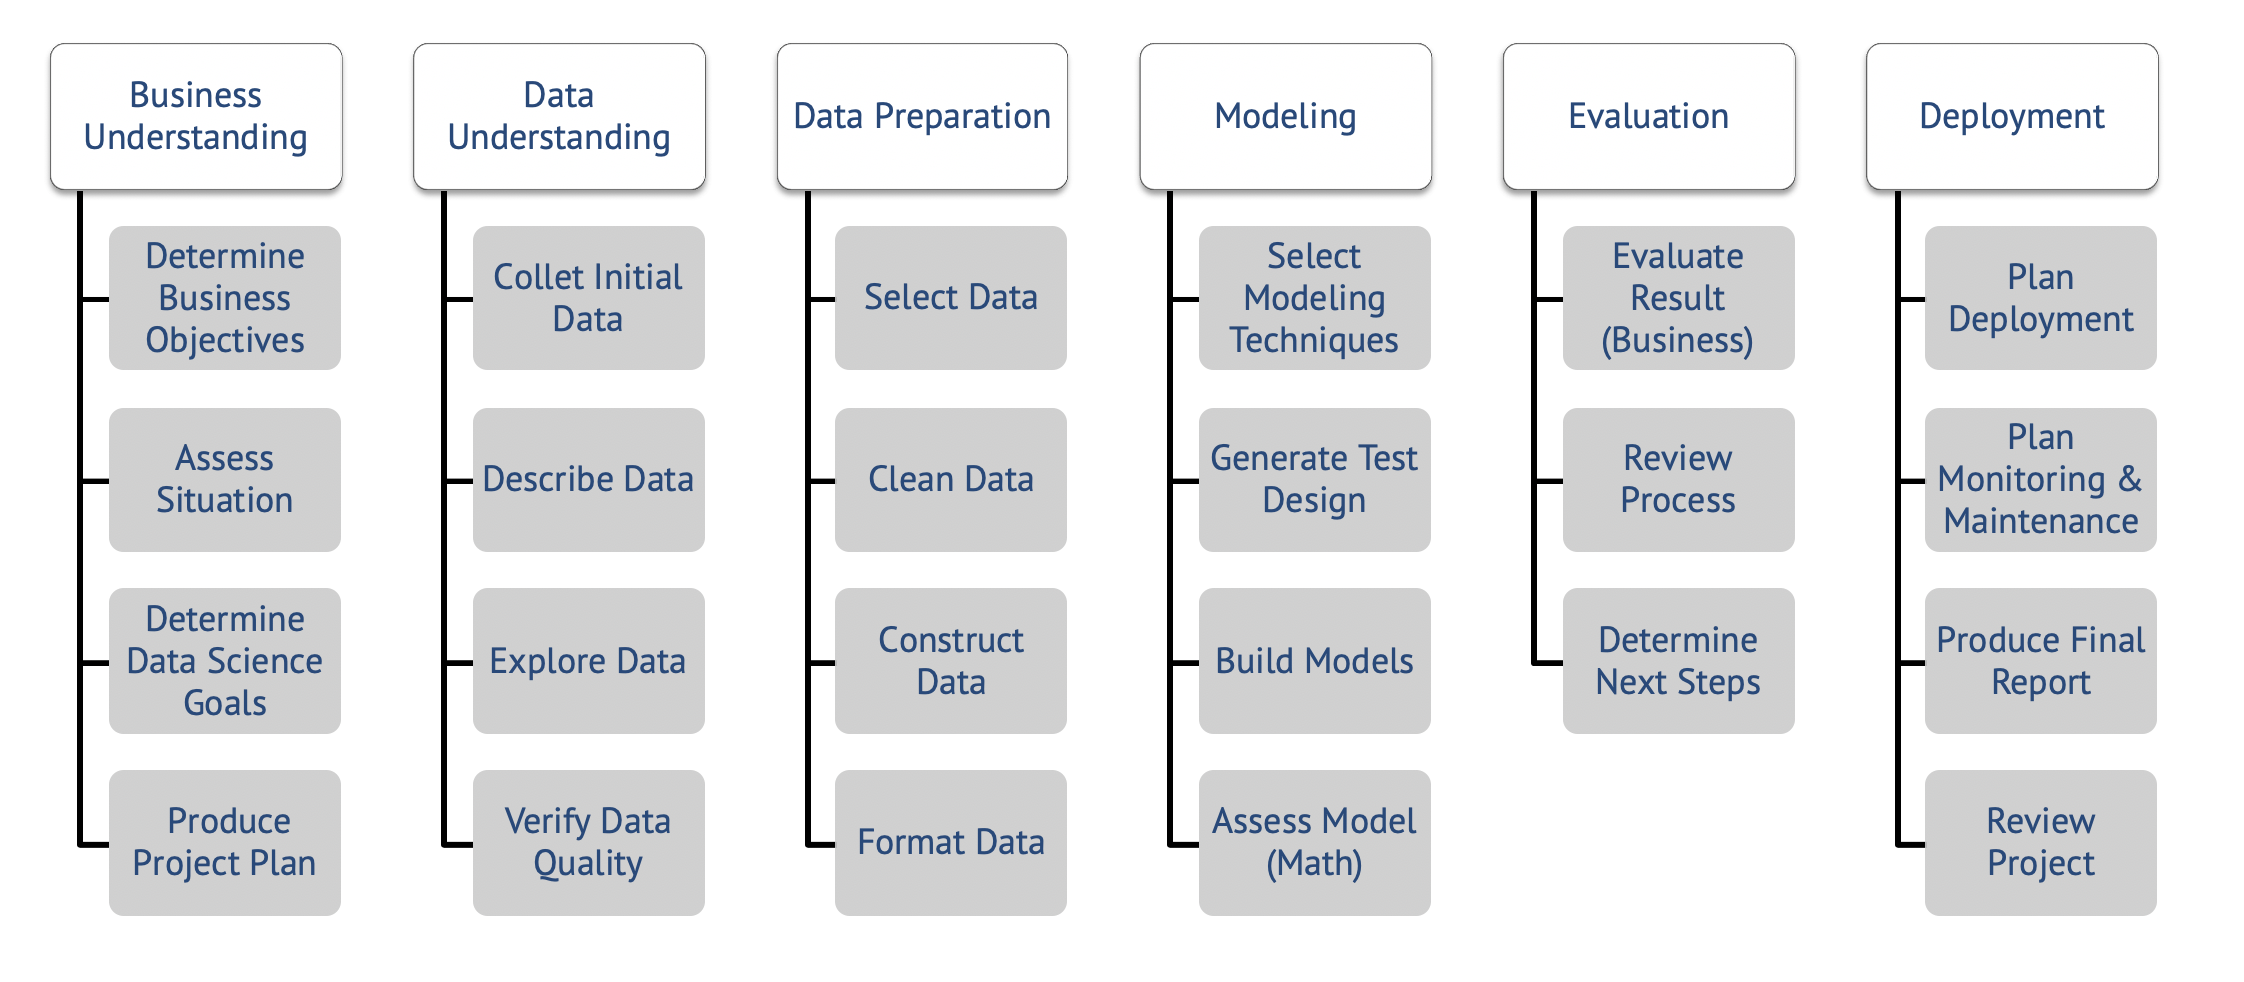

In [4]:
im=Image.open('../reports/figures/CRISP_DM.png')
im

In [5]:
df_data=pd.read_csv('../data/processed/COVID_small_flat_table.csv',sep=';')  
df_data.sort_values('Date',ascending=True).head()

,Date,China,Italy,Iran,Germany,"Korea, South",Spain,US,Brazil,India,Russia
0,2020-01-22,548,0,0,0,1,0,1,0,0,0
1,2020-01-23,643,0,0,0,1,0,1,0,0,0
2,2020-01-24,920,0,0,0,2,0,2,0,0,0
3,2020-01-25,1406,0,0,0,2,0,2,0,0,0
4,2020-01-26,2075,0,0,0,3,0,5,0,0,0


In [6]:
df_data.Italy

0           0
1           0
2           0
3           0
4           0
5           0
6           0
7           0
8           0
9           2
10          2
11          2
12          2
13          2
14          2
15          2
16          3
17          3
18          3
19          3
20          3
21          3
22          3
23          3
24          3
25          3
26          3
27          3
28          3
29          3
30         20
31         62
32        155
33        229
34        322
35        453
36        655
37        888
38       1128
39       1694
40       2036
41       2502
42       3089
43       3858
44       4636
45       5883
46       7375
47       9172
48      10149
49      12462
50      15113
51      17660
52      21157
53      24747
54      27980
55      31506
56      35713
57      41035
58      47021
59      53578
60      59138
61      63927
62      69176
63      74386
64      80589
65      86498
66      92472
67      97689
68     101739
69     105792
70     110574
71    

In [7]:
# initializing some basic parameters
# beta/gamma is denoted as  'basic reproduction number'

N0=1000000 #max susceptible population( population of Italy)
beta=0.4   # infection spread dynamics'
gamma=0.1  # recovery rate


# condition I0+S0+R0=N0
I0=df_data.Italy[30]
S0=N0-I0
R0=0

In [8]:
def SIR_model(SIR,beta,gamma):
    ''' Simple SIR model
        S: susceptible population (populatin that can be effected)
        I: infected people (population already infected)
        R: recovered people (population recovered from COVID)
        beta: 
        
        overall condition is that the sum of changes (differnces) sum up to 0
        dS+dI+dR=0
        S+I+R= N (constant size of population)
    
    '''
    
    S,I,R=SIR
    dS_dt=-beta*S*I/N0          
    dI_dt=beta*S*I/N0-gamma*I
    dR_dt=gamma*I
    return([dS_dt,dI_dt,dR_dt])


# Simulative approach to calculate SIR curves

In [9]:

SIR=np.array([S0,I0,R0])
propagation_rates=pd.DataFrame(columns={'susceptible':S0,
                                        'infected':I0,
                                        'recoverd':R0})



for each_t in np.arange(100):
   
    new_delta_vec=SIR_model(SIR,beta,gamma)
   
    SIR=SIR+new_delta_vec
    
    propagation_rates=propagation_rates.append({'susceptible':SIR[0],
                                                'infected':SIR[1],
                                                'recovered':SIR[2]}, ignore_index=True)


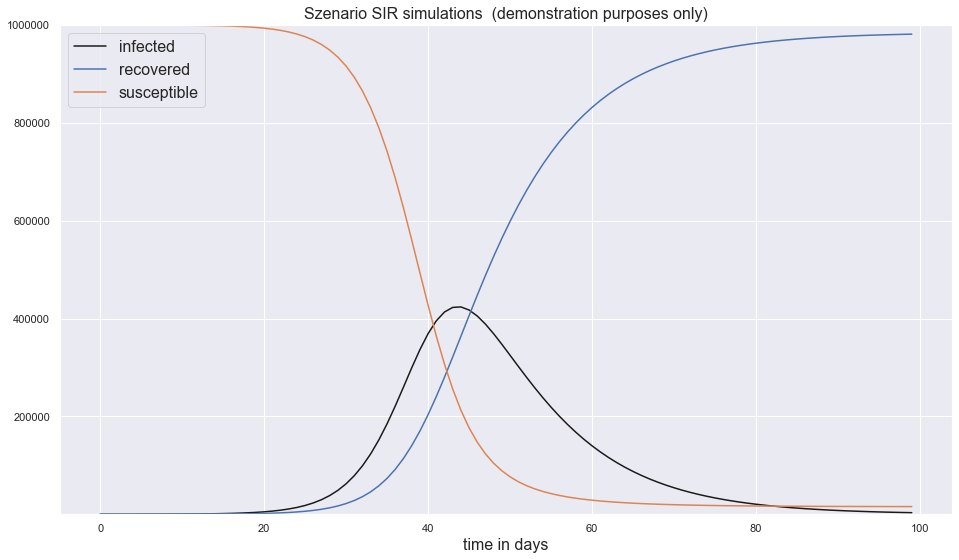

In [10]:
fig, ax1 = plt.subplots(1, 1)

ax1.plot(propagation_rates.index,propagation_rates.infected,label='infected',color='k')
ax1.plot(propagation_rates.index,propagation_rates.recovered,label='recovered')
ax1.plot(propagation_rates.index,propagation_rates.susceptible,label='susceptible')

ax1.set_ylim(10,1000000)
ax1.set_yscale('linear')
ax1.set_title('Szenario SIR simulations  (demonstration purposes only)',size=16)
ax1.set_xlabel('time in days',size=16)
ax1.legend(loc='best',
           prop={'size': 16});

# Fitting the parameters of SIR model

In [11]:
ydata = np.array(df_data.Spain[35:])
t=np.arange(len(ydata))

In [12]:
# ensure re-initialization 
I0=ydata[0]
S0=N0-I0
R0=0

In [13]:
def SIR_model_t(SIR,t,beta,gamma):
    ''' Simple SIR model
        S: susceptible population
        t: time step, mandatory for integral.odeint
        I: infected people
        R: recovered people
        beta: 
        
        overall condition is that the sum of changes (differnces) sum up to 0
        dS+dI+dR=0
        S+I+R= N (constant size of population)
    
    '''
    
    S,I,R=SIR
    dS_dt=-beta*S*I/N0          #S*I is the 
    dI_dt=beta*S*I/N0-gamma*I
    dR_dt=gamma*I
    return dS_dt,dI_dt,dR_dt

In [14]:
def fit_odeint(t, beta, gamma):
    '''
    helper function for the integration
    '''
    return integrate.odeint(SIR_model_t, (S0, I0, R0), t, args=(beta, gamma))[:,1] # we only would like to get dI

In [15]:
# example curve of our differential equationa
popt=[0.4,0.1]
fit_odeint(t, *popt)

array([1.30000000e+01, 1.75480532e+01, 2.36871766e+01, 3.19739284e+01,
       4.31595055e+01, 5.82577757e+01, 7.86370586e+01, 1.06143919e+02,
       1.43270094e+02, 1.93377502e+02, 2.61001384e+02, 3.52258442e+02,
       4.75395820e+02, 6.41528638e+02, 8.65629131e+02, 1.16785023e+03,
       1.57529106e+03, 2.12434194e+03, 2.86378069e+03, 3.85882782e+03,
       5.19639736e+03, 6.99178651e+03, 9.39700105e+03, 1.26107580e+04,
       1.68898531e+04, 2.25608865e+04, 3.00301202e+04, 3.97872943e+04,
       5.23965049e+04, 6.84641150e+04, 8.85715285e+04, 1.13162472e+05,
       1.42384643e+05, 1.75907801e+05, 2.12771628e+05, 2.51340998e+05,
       2.89437022e+05, 3.24652403e+05, 3.54770272e+05, 3.78144634e+05,
       3.93916381e+05, 4.02020907e+05, 4.03032277e+05, 3.97932743e+05,
       3.87888237e+05, 3.74075633e+05, 3.57573596e+05, 3.39308209e+05,
       3.20037214e+05, 3.00357401e+05, 2.80723506e+05, 2.61471114e+05,
       2.42839301e+05, 2.24990953e+05, 2.08030015e+05, 1.92015599e+05,
      

In [16]:
# the resulting curve has to be fitted
# free parameters are here beta and gamma

In [17]:
popt, pcov = optimize.curve_fit(fit_odeint, t, ydata)
perr = np.sqrt(np.diag(pcov))
    
print('standard deviation errors : ',str(perr), ' start infect:',ydata[0])
print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])



C:\Users\sohai\anaconda3\lib\site-packages\scipy\integrate\odepack.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
C:\Users\sohai\anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in double_scalars
  app.launch_new_instance()
C:\Users\sohai\anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in double_scalars
C:\Users\sohai\anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in double_scalars
C:\Users\sohai\anaconda3\lib\site-packages\scipy\integrate\odepack.py:248: ODEintWarning: Illegal input detected (internal error). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


standard deviation errors :  [0.0024641  0.00212522]  start infect: 13
Optimal parameters: beta = 0.12878991548991975  and gamma =  0.034628863588088116


In [18]:
# get the final fitted curve
fitted=fit_odeint(t, *popt)

In [19]:
fitted

array([1.30000000e+01, 1.42835515e+01, 1.56938302e+01, 1.72433477e+01,
       1.89458500e+01, 2.08164404e+01, 2.28717129e+01, 2.51298993e+01,
       2.76110311e+01, 3.03371168e+01, 3.33323369e+01, 3.66232585e+01,
       4.02390702e+01, 4.42118412e+01, 4.85768050e+01, 5.33726717e+01,
       5.86419704e+01, 6.44314259e+01, 7.07923724e+01, 7.77812075e+01,
       8.54598909e+01, 9.38964929e+01, 1.03165796e+02, 1.13349954e+02,
       1.24539222e+02, 1.36832749e+02, 1.50339454e+02, 1.65178988e+02,
       1.81482788e+02, 1.99395236e+02, 2.19074927e+02, 2.40696067e+02,
       2.64450003e+02, 2.90546906e+02, 3.19217608e+02, 3.50715632e+02,
       3.85319405e+02, 4.23334693e+02, 4.65097272e+02, 5.10975847e+02,
       5.61375263e+02, 6.16740014e+02, 6.77558096e+02, 7.44365219e+02,
       8.17749420e+02, 8.98356116e+02, 9.86893627e+02, 1.08413922e+03,
       1.19094570e+03, 1.30824866e+03, 1.43707429e+03, 1.57854803e+03,
       1.73390392e+03, 1.90449477e+03, 2.09180332e+03, 2.29745427e+03,
      

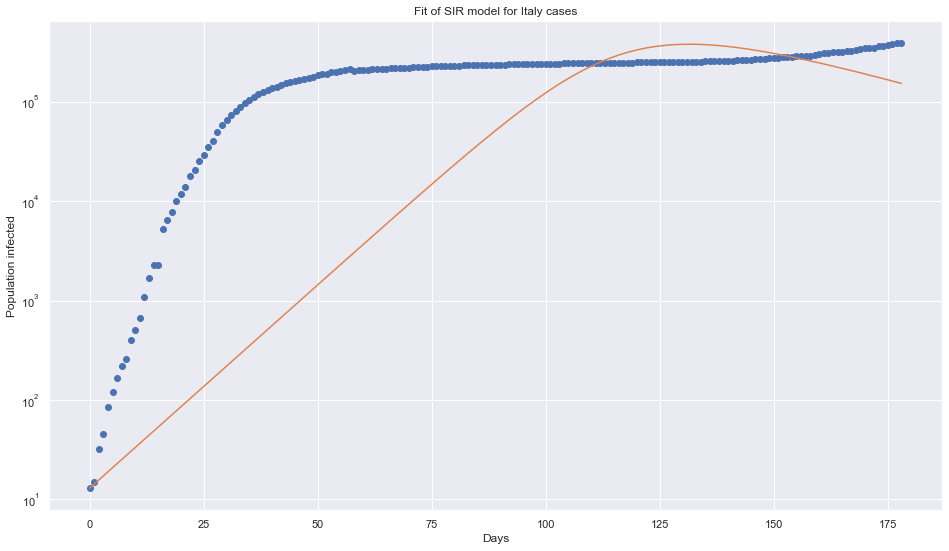

Optimal parameters: beta = 0.12878991548991975  and gamma =  0.034628863588088116
Basic Reproduction Number R0  3.719149349568082
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


In [20]:
plt.semilogy(t, ydata, 'o')
plt.semilogy(t, fitted)
plt.title("Fit of SIR model for Italy cases")
plt.ylabel("Population infected")
plt.xlabel("Days")
plt.show()
print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])
print("Basic Reproduction Number R0 " , popt[0]/ popt[1])
print("This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki")

# Fitting SIR curve for all top 100 countries

In [21]:


df_data=pd.read_csv('../data/processed/COVID_full_flat_table.csv',sep=';') 
df_pop=pd.read_csv('../data/processed/world_population.csv',sep=";")  


In [22]:
df_data=df_data.iloc[60:,:] #removing first 50 days of covid spread as the data is inconsistent
df_data=df_data.drop(['Taiwan*'], axis= 1) # dropping taiwan as the data is inconsistent
df_data=df_data.reset_index()
df_data=df_data.drop(['index'], axis=1)
df_data=df_data.rename(columns={'level_0':'index'})

In [23]:
df_data=df_data.reset_index()
df_data=df_data.drop(['index'], axis=1)
df_data=df_data.rename(columns={'level_0':'index'})
    
    
df= pd.DataFrame(df_data.loc[0])
df=df.reset_index()
df = df.iloc[1:]
country_list= list(df[df[0]>38]['index']) #finding countries with significant number of covid cases i.e,>38
country_list.insert(0, 'Date')
df_data=df_data[country_list] # confining data frame to that perticular countries
    

In [ ]:
for each in country_list[1:]:
        ydata = np.array(df_data[each])
        t=np.arange(len(ydata))
        N0= df_pop[df_pop['country']== each]['population']
        I0=ydata[0]
        S0 = N0-I0
        R0=0
        popt, pcov = optimize.curve_fit(fit_odeint, t, ydata)
        perr = np.sqrt(np.diag(pcov))
        fitted = fit_odeint(t, *popt).reshape((-1,1))
        df_data[each+'_SIR']= fitted
    

In [44]:
df_data.to_csv('../data/processed/COVID_SIR_model.csv',sep=';',index=False)


# Dynamic beta in SIR (infection rate)

In [54]:
df_data=pd.read_csv('../data/processed/COVID_full_flat_table.csv',sep=';') 
df_pop=pd.read_csv('../data/processed/world_population.csv',sep=";")  

In [55]:
ydata = np.array(df_data.Spain[35:])
t=np.arange(len(ydata))

In [56]:
t_initial=30
t_intro_measures=10
t_hold=50
t_relax=30

beta_max=0.4
beta_min=0.1
gamma=0.1
pd_beta=np.concatenate((np.array(t_initial*[beta_max]),
                       np.linspace(beta_max,beta_min,t_intro_measures),
                       np.array(t_hold*[beta_min]),
                        np.linspace(beta_min,beta_max,t_relax),
                       ))





In [57]:
pd_beta

array([0.4       , 0.4       , 0.4       , 0.4       , 0.4       ,
       0.4       , 0.4       , 0.4       , 0.4       , 0.4       ,
       0.4       , 0.4       , 0.4       , 0.4       , 0.4       ,
       0.4       , 0.4       , 0.4       , 0.4       , 0.4       ,
       0.4       , 0.4       , 0.4       , 0.4       , 0.4       ,
       0.4       , 0.4       , 0.4       , 0.4       , 0.4       ,
       0.4       , 0.36666667, 0.33333333, 0.3       , 0.26666667,
       0.23333333, 0.2       , 0.16666667, 0.13333333, 0.1       ,
       0.1       , 0.1       , 0.1       , 0.1       , 0.1       ,
       0.1       , 0.1       , 0.1       , 0.1       , 0.1       ,
       0.1       , 0.1       , 0.1       , 0.1       , 0.1       ,
       0.1       , 0.1       , 0.1       , 0.1       , 0.1       ,
       0.1       , 0.1       , 0.1       , 0.1       , 0.1       ,
       0.1       , 0.1       , 0.1       , 0.1       , 0.1       ,
       0.1       , 0.1       , 0.1       , 0.1       , 0.1    

In [58]:
SIR=np.array([S0,I0,R0])
propagation_rates=pd.DataFrame(columns={'susceptible':S0,
                                        'infected':I0,
                                        'recoverd':R0})



for each_beta in pd_beta:
   
    new_delta_vec=SIR_model(SIR,each_beta,gamma)
   
    SIR=SIR+new_delta_vec
    
    propagation_rates=propagation_rates.append({'susceptible':SIR[0],
                                                'infected':SIR[1],
                                                'recovered':SIR[2]}, ignore_index=True)

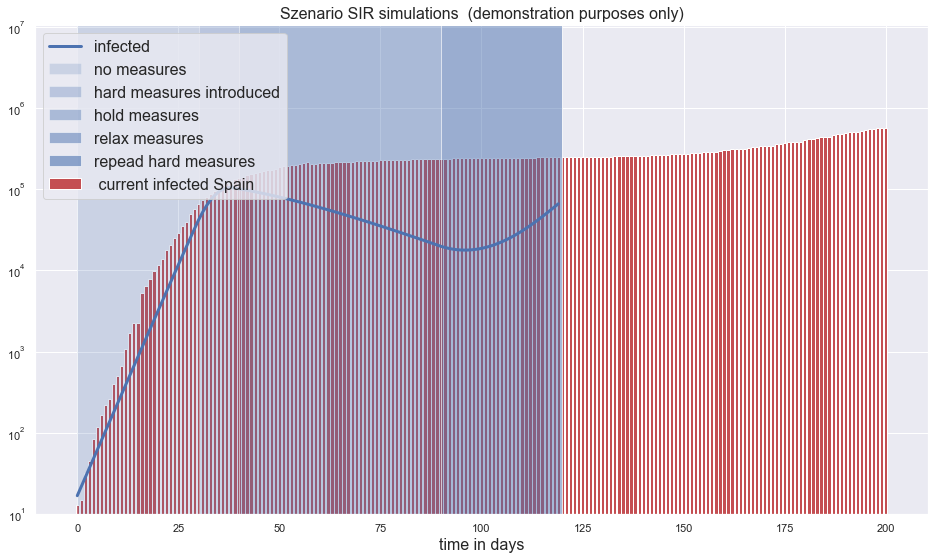

In [59]:
fig, ax1 = plt.subplots(1, 1)

ax1.plot(propagation_rates.index,propagation_rates.infected,label='infected',linewidth=3)

t_phases=np.array([t_initial,t_intro_measures,t_hold,t_relax]).cumsum()
ax1.bar(np.arange(len(ydata)),ydata, width=0.8,label=' current infected Spain',color='r')
ax1.axvspan(0,t_phases[0], facecolor='b', alpha=0.2,label='no measures')
ax1.axvspan(t_phases[0],t_phases[1], facecolor='b', alpha=0.3,label='hard measures introduced')
ax1.axvspan(t_phases[1],t_phases[2], facecolor='b', alpha=0.4,label='hold measures')
ax1.axvspan(t_phases[2],t_phases[3], facecolor='b', alpha=0.5,label='relax measures')
ax1.axvspan(t_phases[3],len(propagation_rates.infected), facecolor='b', alpha=0.6,label='repead hard measures')

ax1.set_ylim(10, 100*max(propagation_rates.infected))
ax1.set_yscale('log')
ax1.set_title('Szenario SIR simulations  (demonstration purposes only)',size=16)
ax1.set_xlabel('time in days',size=16)
ax1.legend(loc='best',
           prop={'size': 16});